# Описание задачи
Задача заключается в классификации уровня ожирения человека на основе различных признаков, таких как физическая активность, привычки питания, возраст и пол. Это задача многоклассовой классификации, где целевая переменная представляет уровень ожирения.

# 1. Загрузка данных

In [46]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score



In [49]:
from google.colab import files
uploaded = files.upload()

import io
data_raw = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet_raw_and_data_sinthetic_.csv']))



Saving ObesityDataSet_raw_and_data_sinthetic_.csv to ObesityDataSet_raw_and_data_sinthetic_.csv


In [ ]:
data_raw.shape


(2111, 17)

In [ ]:
data_raw

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21


*   **Gender** мужской\женский
*   **Age**  Возраст (число)
*   **Height** Рост
*   **Weight** Вес
*   **family_history_with_overweight** Страдает ли кто-либо из членов семьи избыточным весом?
*   **FAVC** : Часто ли вы едите высококалорийную пищу?
*   **FCVC** : Вы обычно едите овощи во время еды?
*   **NCP** : Сколько основных приемов пищи у вас в день?
*   **CAEC** : Вы едите какую-либо пищу между приемами пищи?
*   **SMOKE** : Вы курите?
*   **CH2O**: Сколько воды вы пьете ежедневно?
*   **SCC**: Вы следите за калориями, которые вы потребляете ежедневно?
*   **FAF**: HСколько времени вы используете технологические устройства, такие как мобильный телефон, видеоигры, телевизор, компьютер и т. д.?
*   **TUE** : Как много времени вы используете технологические устройства, такие как мобильный телефон, видеоигры, телевизор, компьютер и другие?
*   **CALC** : Как часто вы пьете алкоголь?
*   **MTRANS** : Каким транспортом вы обычно пользуетесь?
*   **NObeyesdad** Уровень ожирения


# 4. Обработка категориальных признаков




In [ ]:
data_raw['Gender'] = data_raw['Gender'].astype('category')

data_raw['CALC'] = data_raw['CALC'].astype('category')

data_raw['FAVC'] = data_raw['FAVC'].astype('category')

data_raw['SCC'] = data_raw['SCC'].astype('category')

data_raw['SMOKE'] = data_raw['SMOKE'].astype('category')

data_raw['family_history_with_overweight'] = data_raw['family_history_with_overweight'].astype('category')

data_raw['CAEC'] = data_raw['CAEC'].astype('category')

data_raw['MTRANS'] = data_raw['MTRANS'].astype('category')

data_raw['NObeyesdad'] = data_raw['NObeyesdad'].astype('category')


In [ ]:
data_raw['Gender'].dtype



CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['CALC'].dtype

CategoricalDtype(categories=['Always', 'Frequently', 'Sometimes', 'no'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['FAVC'].dtype


CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['SCC'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['SMOKE'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['family_history_with_overweight'].dtype


CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['CAEC'].dtype


CategoricalDtype(categories=['Always', 'Frequently', 'Sometimes', 'no'], ordered=False, categories_dtype=object)

In [ ]:
data_raw['MTRANS'].dtype

CategoricalDtype(categories=['Automobile', 'Bike', 'Motorbike', 'Public_Transportation',
                  'Walking'],
, ordered=False, categories_dtype=object)

In [ ]:
value_counts = data_raw['NObeyesdad'].value_counts()
value_counts


,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [ ]:
label_encoder = LabelEncoder()
data_raw['NObeyesdad'] = label_encoder.fit_transform(data_raw['NObeyesdad'])


Преобразование целевого столбца NObeyesdad в числовые значения


In [ ]:
categorical_columns = data_raw.select_dtypes(include=['category']).columns.tolist()
categorical_columns

for col in categorical_columns:
    data_raw[col]=label_encoder.fit_transform(data_raw[col])


data_raw


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,3,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,2,3,1
1,21.000000,0,1.520000,56.000000,2,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,2,3,1
2,23.000000,1,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,2,3,1
3,27.000000,1,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,4,5
4,22.000000,1,1.780000,89.800000,2,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,2,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,2,3,4
2107,21.982942,0,1.748584,133.742943,2,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,2,3,4
2108,22.524036,0,1.752206,133.689352,2,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,2,3,4
2109,24.361936,0,1.739450,133.346641,2,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,2,3,4


# 2. Визуализация данных, вычисление основных характеристик

In [ ]:
data_raw.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


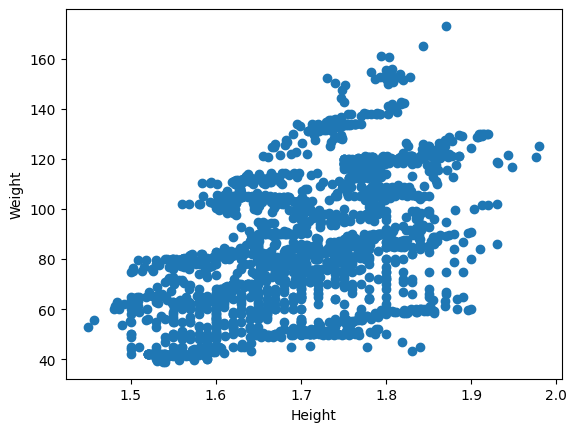

In [ ]:
plt.scatter(data_raw['Height'], data_raw['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
pass

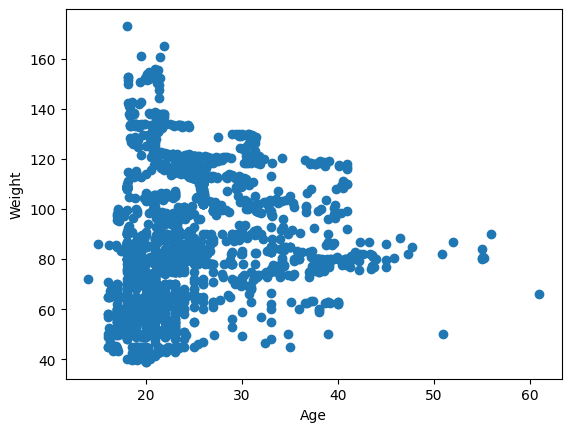

In [ ]:
plt.scatter(data_raw['Age'], data_raw['Weight'])
plt.xlabel('Age')
plt.ylabel('Weight')
pass

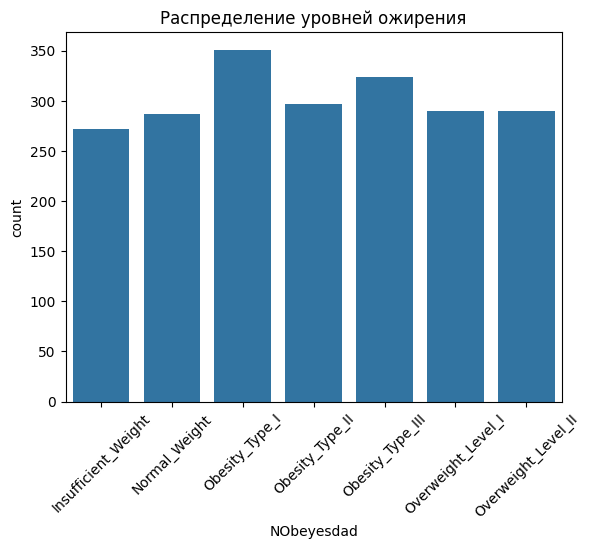

In [ ]:
sns.countplot(x='NObeyesdad', data=data_raw)
plt.title('Распределение уровней ожирения')
plt.xticks(rotation=45)
plt.show()


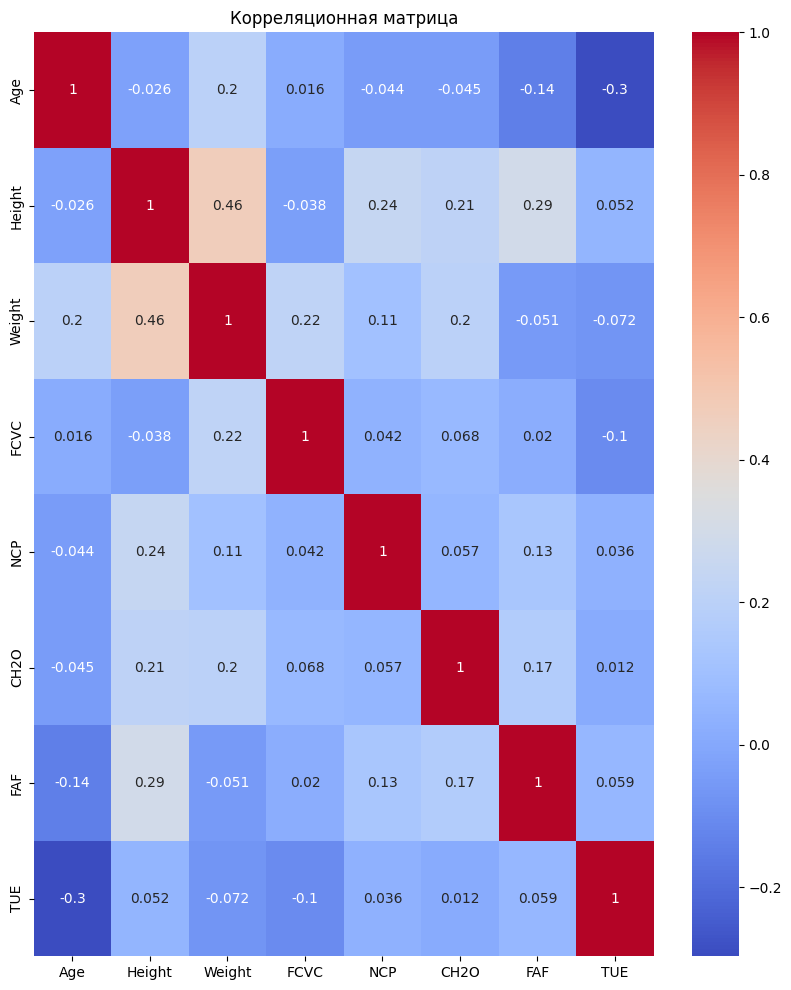

In [50]:

plt.figure(figsize=(10, 12))
corr_matrix = data_raw.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


In [ ]:
corr_matrix > 0.2


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,True,False,True,False,False,False,False,False
Height,False,True,True,False,True,True,True,False
Weight,True,True,True,True,False,True,False,False
FCVC,False,False,True,True,False,False,False,False
NCP,False,True,False,False,True,False,False,False
CH2O,False,True,True,False,False,True,False,False
FAF,False,True,False,False,False,False,True,False
TUE,False,False,False,False,False,False,False,True


In [ ]:
data_raw.describe(include=['category'])


,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [ ]:
data_raw.columns


Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# 3. Обработка пропущенных значений

In [ ]:
data_raw.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


Пропущенных значений нет

# 5. Нормализация данных





In [ ]:
scaler=StandardScaler()
data_raw["Weight"] = scaler.fit_transform(data_raw["Weight"].values.reshape(-1, 1))

# 6. Разбиение данных на обучающую и тестовую выборки



In [ ]:
X = data_raw.drop(columns=['NObeyesdad'])
y = data_raw['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1930,25.982113,0,1.627818,0.719595,2,1,3.000000,3.0,0,0,1.480750,1,0.098043,0.663492,2,3
1803,26.000000,0,1.656320,0.967996,2,1,3.000000,3.0,0,0,2.774014,1,0.000000,0.138418,2,3
1198,18.000000,1,1.750097,-0.008169,2,1,2.907062,3.0,0,0,2.740848,1,1.219827,0.037634,2,3
15,22.000000,0,1.700000,-0.786178,2,0,3.000000,3.0,1,0,2.000000,1,2.000000,1.000000,0,3
816,23.451595,1,1.670227,-0.442470,2,1,2.000000,3.0,0,0,2.000000,1,0.129163,1.983678,2,3


# 7. Инициализация и обучение модели KNN - классификатор К - ближайших соседей

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Accuracy на обучающей выборке:", accuracy_score(y_train, y_train_pred))
print("Accuracy на тестовой выборке:", accuracy_score(y_test, y_test_pred))


Accuracy на обучающей выборке: 0.8672985781990521
Accuracy на тестовой выборке: 0.7917981072555205


# 8. Поиск оптимального значения гиперпараметра

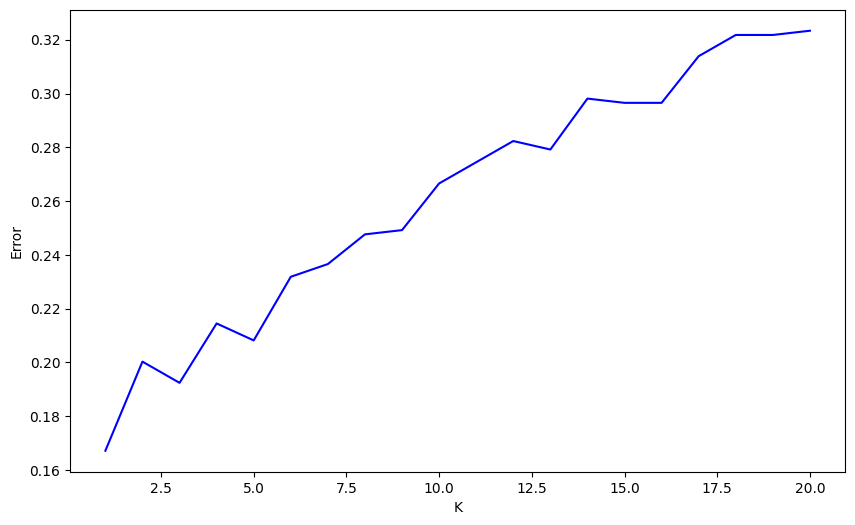

In [ ]:
error_rate = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate,'-b')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Accuracy на обучающей выборке:", accuracy_score(y_train, y_train_pred))
print("Accuracy на тестовой выборке:", accuracy_score(y_test, y_test_pred))


Accuracy на обучающей выборке: 0.9079214624238321
Accuracy на тестовой выборке: 0.807570977917981


Модель KNN продемонстрировала точность 0.8 на тестовой выборке. Анализ графика зависимости ошибки от количества соседей показывает, что высокая точность достигается при k = 3.